# EMIPredict AI - Intelligent Financial Risk Assessment Platform

### Summary

##### EMIPredict AI is an advanced FinTech and banking solution designed to enhance financial risk assessment and improve loan decision-making through the power of machine learning and data analytics. The platform predicts an individual's EMI (Equated Monthly Installment) repayment capability using predictive modeling and interactive visualizations.

##### Using Python and Streamlit, the project offers an intuitive web-based interface where users can input financial details and instantly receive EMI predictions along with risk classifications. The backend integrates MLflow for efficient experiment tracking, model versioning, and performance comparison, ensuring reproducible and scalable model development.

##### The project encompasses key machine learning workflows including data preprocessing, feature engineering, regression and classification modeling, and model evaluation. Multiple algorithms are tested and optimized to achieve high prediction accuracy.

##### By providing data-driven insights into financial stability and loan repayment potential, EMIPredict AI empowers banks, financial institutions, and individuals to make more informed, transparent, and responsible lending or borrowing decisions.

##### Key Skills Gained: Python | Streamlit Cloud Deployment | Machine Learning | Data Analysis | MLflow | Classification & Regression Models | Feature Engineering | Data Preprocessing

#### 1. Data Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge  # faster + stable
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from time import perf_counter
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Loading the dataset
df = pd.read_csv(r"/Users/shashankshandilya/Desktop/Data Science/EMIPredict project/emi_prediction_dataset.csv")

df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi,approved
0,38,Female,Married,Professional,"₹82,600",Private,0.9,Mid-size,Rented,"₹20,000",...,"₹23,700",660,"₹303,200","₹70,200",Personal Loan EMI,"₹850,000",15,Not_Eligible,₹500,0
1,38,Female,Married,Graduate,"₹21,500",Private,7.0,MNC,Family,₹0,...,"₹4,100",714,"₹92,500","₹26,900",E-commerce Shopping EMI,"₹128,000",19,Not_Eligible,₹700,0
2,38,Male,Married,Professional,"₹86,100",Private,5.8,Startup,Own,₹0,...,₹0,650,"₹672,100","₹324,200",Education EMI,"₹306,000",16,Eligible,"₹27,775",1
3,58,Female,Married,High School,"₹66,800",Private,2.2,Mid-size,Own,₹0,...,₹0,685,"₹440,900","₹178,100",Vehicle EMI,"₹304,000",83,Eligible,"₹16,170",1
4,48,Female,Married,Professional,"₹57,300",Private,3.4,Mid-size,Family,₹0,...,₹0,770,"₹97,300","₹28,200",Home Appliances EMI,"₹252,000",7,Not_Eligible,₹500,0


In [3]:
df.dtypes

age                         int64
gender                     object
marital_status             object
education                  object
monthly_salary             object
employment_type            object
years_of_employment       float64
company_type               object
house_type                 object
monthly_rent               object
family_size                 int64
dependents                  int64
school_fees                object
college_fees               object
travel_expenses            object
groceries_utilities        object
other_monthly_expenses     object
existing_loans             object
current_emi_amount         object
credit_score                int64
bank_balance               object
emergency_fund             object
emi_scenario               object
requested_amount           object
requested_tenure            int64
emi_eligibility            object
max_monthly_emi            object
approved                    int64
dtype: object

In [4]:
# Strip extra spaces and standardize all string columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Remove duplicates
df = df.drop_duplicates()

# Handle missing and NaN values
df = df.fillna(0)

/var/folders/_3/b3lbcghd6t732qc41_rrlm9c0000gn/T/ipykernel_4299/3408414020.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
# Columns to round and format to currency columns
money_cols = [
    'monthly_rent', 'school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities',
    'other_monthly_expenses', 'current_emi_amount', 'emergency_fund', 'requested_amount',
    'max_monthly_emi', 'monthly_salary', 'bank_balance'
]

for c in money_cols:
    # Remove unwanted symbols (₹, commas, spaces, etc.)
    s = df[c].astype(str).str.replace(r'[^0-9.\-]', '', regex=True).replace('', '0')
    
    # Convert to numeric, round, and cast to int
    nums = pd.to_numeric(s, errors='coerce').fillna(0).round(0).astype(int)
    
    # Replace original column with formatted ₹ string (no .00)
    df[c] = nums.map(lambda x: f"₹{x:,}")

df[money_cols].head()


,monthly_rent,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,current_emi_amount,emergency_fund,requested_amount,max_monthly_emi,monthly_salary,bank_balance
0,"₹20,000",₹0,₹0,"₹7,200","₹19,500","₹13,200","₹23,700","₹70,200","₹850,000",₹500,"₹82,600","₹303,200"
1,₹0,"₹5,100",₹0,"₹1,400","₹5,400","₹3,500","₹4,100","₹26,900","₹128,000",₹700,"₹21,500","₹92,500"
2,₹0,₹0,₹0,"₹10,200","₹19,400","₹6,000",₹0,"₹324,200","₹306,000","₹27,775","₹86,100","₹672,100"
3,₹0,"₹11,400",₹0,"₹6,200","₹11,900","₹7,900",₹0,"₹178,100","₹304,000","₹16,170","₹66,800","₹440,900"
4,₹0,"₹9,400","₹21,300","₹3,600","₹16,200","₹8,100",₹0,"₹28,200","₹252,000",₹500,"₹57,300","₹97,300"


In [6]:
# Convert to round  and format to numeric columns
df['age'] = pd.to_numeric(df['age'], errors='coerce').fillna(0).astype(int)
df['credit_score'] = pd.to_numeric(df['credit_score'], errors='coerce').fillna(0).astype(int)

df[['credit_score', 'age']].head()


,credit_score,age
0,660,38
1,714,38
2,650,38
3,685,58
4,770,48


In [7]:
# Clean 'gender' column
df['gender'] = df['gender'].astype(str).str.strip().str.lower()

df['gender'] = df['gender'].replace({
    'm': 'Male', 'male': 'Male', 'male ': 'Male', 'MALE': 'Male',
    'f': 'Female', 'female': 'Female', 'female ': 'Female', 'FEMALE': 'Female'
})

In [8]:
# Data Quality Assessment
print("\nMissing Values:\n", df.isna().sum()[df.isna().sum()>0])
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nUnique Value Check:\n", df.nunique())
print("\nData Types:\n", df.dtypes)


Missing Values:
 Series([], dtype: int64)

Duplicate Rows: 0

Unique Value Check:
 age                          16
gender                        2
marital_status                2
education                     4
monthly_salary            12781
employment_type               3
years_of_employment         356
company_type                  5
house_type                    3
monthly_rent               4396
family_size                   5
dependents                    5
school_fees                 132
college_fees                202
travel_expenses             284
groceries_utilities         544
other_monthly_expenses      373
existing_loans                2
current_emi_amount          508
credit_score                427
bank_balance              10615
emergency_fund             5487
emi_scenario                  5
requested_amount           1491
requested_tenure             82
emi_eligibility               3
max_monthly_emi           13680
approved                      2
dtype: int64

Data T

In [9]:
# Train-Test-Validation Split
train, temp = train_test_split(df, test_size=0.3, random_state=42)
val, test = train_test_split(temp, test_size=0.5, random_state=42)

print(f"\nTrain: {len(train)}, Validation: {len(val)}, Test: {len(test)}")


Train: 283360, Validation: 60720, Test: 60720


In [10]:
# Save cleaned dataset back to same file
df.to_csv('/Users/shashankshandilya/Desktop/Data Science/EMIPredict project/emi_prediction_dataset.csv', index=False)

print("Dataset cleaned and saved successfully!")

Dataset cleaned and saved successfully!


#### 2. Exploratory Data Analysis

##### -> Analyze EMI eligibility distribution patterns across different lending scenarios

emi_scenario,applications,approved,approval_rate
E-commerce Shopping EMI,80948,21303,26%
Education EMI,80942,14355,18%
Home Appliances EMI,80988,21058,26%
Personal Loan EMI,80980,9182,11%
Vehicle EMI,80942,8546,11%


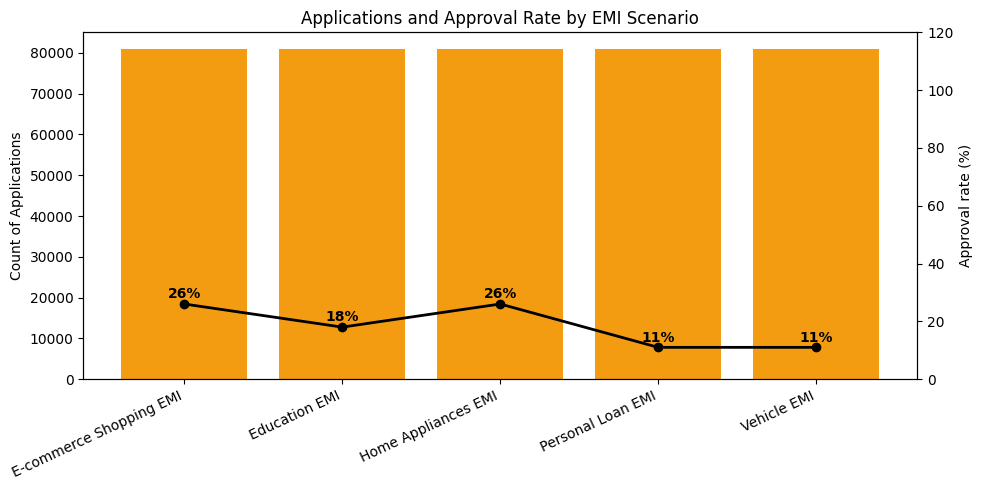

In [11]:
# 1. EMI Scenario - Applications & Approval Rate
df.columns = df.columns.str.strip()
df['emi_scenario'] = df['emi_scenario'].str.strip()
df['emi_eligibility'] = df['emi_eligibility'].str.strip()

#Plotting the Pivot
pivot1 = df.groupby('emi_scenario')['emi_eligibility'].agg(
    applications='size',
    approved=lambda s: (s=='Eligible').sum()
)
pivot1['approval_rate'] = (pivot1['approved']/pivot1['applications']*100).round(0).astype(int).astype(str)+'%'

# Display as table
display(pivot1.reset_index().style.set_table_attributes('style="border:1px solid black;"').hide(axis='index'))

#Plotting the Graph
x = np.arange(len(pivot1))
rates = (pivot1['approved']/pivot1['applications']*100).round(0).astype(int)

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.bar(x, pivot1['applications'], color='#f39c12')
ax1.set_xticks(x)
ax1.set_xticklabels(pivot1.index, rotation=25, ha='right')
ax1.set_ylabel('Count of Applications')
ax1.set_title('Applications and Approval Rate by EMI Scenario')

ax2 = ax1.twinx()
ax2.plot(x, rates, 'ko-', linewidth=2)
ax2.set_ylabel('Approval rate (%)')
ax2.set_yticks(np.arange(0, 121, 20))  # 0, 20, 40, 60, 80, 100, 120

for i, r in enumerate(rates):
    ax2.text(i, r+2, f'{r}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


emi_scenario,Eligible,High_Risk,Not_Eligible
E-commerce Shopping EMI,26%,5%,69%
Education EMI,18%,5%,78%
Home Appliances EMI,26%,5%,69%
Personal Loan EMI,11%,3%,85%
Vehicle EMI,11%,3%,86%


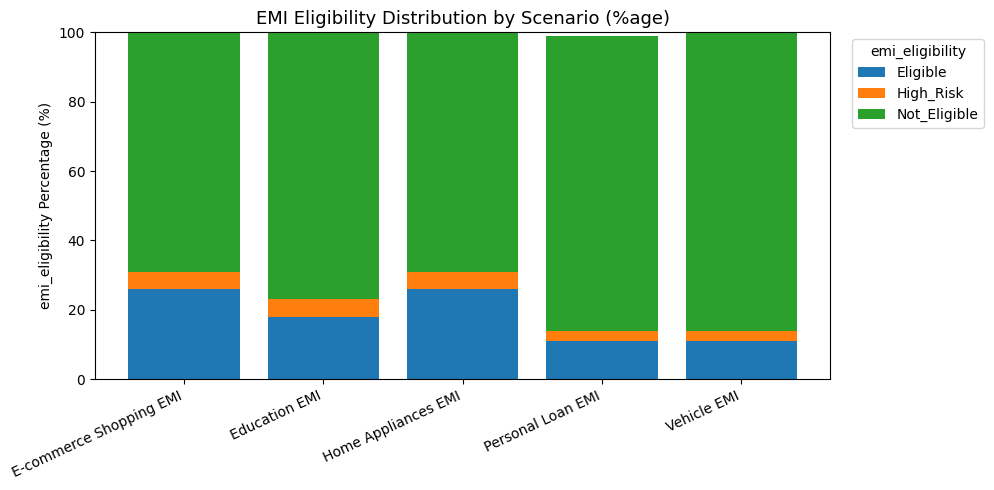

In [12]:
# 2. %age distribution of emi_eligibility per emi_scenario

# Plotting the Pivot
cros = pd.crosstab(df['emi_scenario'], df['emi_eligibility'])
cros_pct = (cros.div(cros.sum(axis=1), axis=0) * 100).round(0).astype(int)
cros_pct_str = cros_pct.astype(str) + '%'

# Display as table
display(cros_pct_str.reset_index().style.set_table_attributes('style="border:1px solid black;"').hide(axis='index'))


# Plotting the graph
x = np.arange(len(cros_pct))
fig, ax = plt.subplots(figsize=(10,5))

bottom = np.zeros(len(cros_pct))
for col in cros_pct.columns:
    ax.bar(cros_pct.index, cros_pct[col], bottom=bottom, label=col)
    bottom += cros_pct[col]

ax.set_title("EMI Eligibility Distribution by Scenario (%age)", fontsize=13)
ax.set_ylabel("emi_eligibility Percentage (%)")
ax.set_ylim(0, 100)
ax.legend(title="emi_eligibility", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

##### -> Study correlation between financial variables and loan approval rates

Financial Variables,Loan Approval Rates (%)
max_monthly_emi,56%
bank_balance,25%
emergency_fund,23%
other_monthly_expenses,22%
monthly_salary,21%
credit_score,11%
requested_tenure,1%
current_emi_amount,-14%
requested_amount,-30%


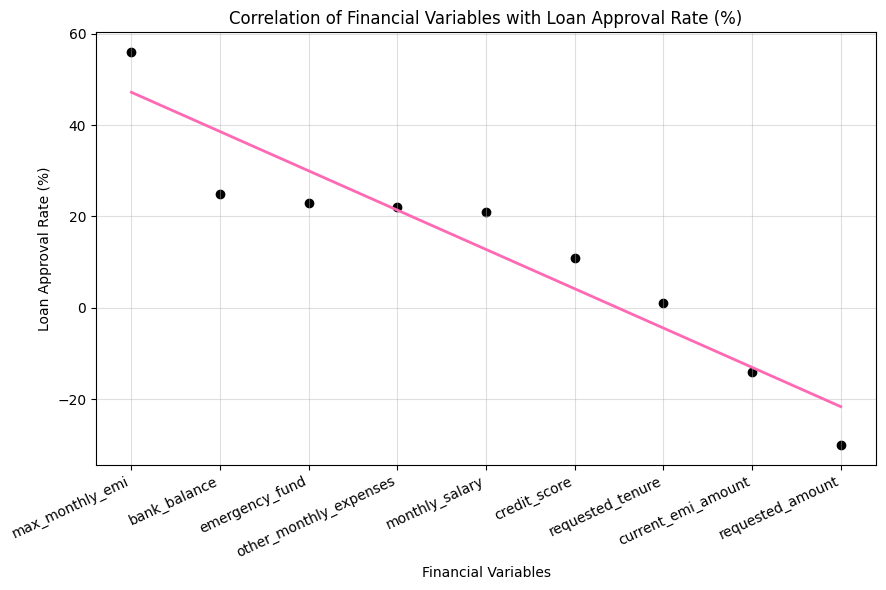

In [13]:
# Correlation between financial variables & loan approval rates (% age)
cols = ['monthly_salary','bank_balance','current_emi_amount','other_monthly_expenses',
        'requested_amount','max_monthly_emi','emergency_fund','credit_score','requested_tenure']
cols = [c for c in cols if c in df.columns]

for c in cols:
    df[c] = pd.to_numeric(df[c].astype(str).str.replace(r'[^0-9.\-]', '', regex=True), errors='coerce')

df['approved'] = (df['emi_eligibility'].str.strip() == 'Eligible').astype(int)

corr = (df[cols + ['approved']].corr()['approved'].drop('approved')*100).round(0).astype(int)
corr = corr.sort_values(ascending=False).reset_index()
corr.columns = ['Financial Variables', 'Loan Approval Rates (%)']
corr['Loan Approval Rates (%)'] = corr['Loan Approval Rates (%)'].astype(str) + '%'

display(corr.style.hide(axis='index'))

# Plot correlation scatter plot
x = np.arange(len(corr))                   # Convert correlation values to numeric (remove %)
y = corr['Loan Approval Rates (%)'].str.replace('%', '').astype(float)

plt.figure(figsize=(9,6))
plt.scatter(x, y, color='black')  # Scatter points
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x), color='hotpink', linewidth=2)  # Trend line

plt.title('Correlation of Financial Variables with Loan Approval Rate (%)', fontsize=12)
plt.xlabel('Financial Variables')
plt.ylabel('Loan Approval Rate (%)')
plt.xticks(x, corr['Financial Variables'], rotation=25, ha='right')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

##### -> Investigate demographic patterns and risk factor relationships

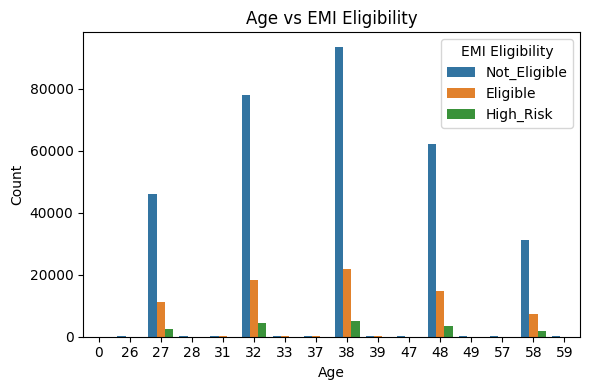

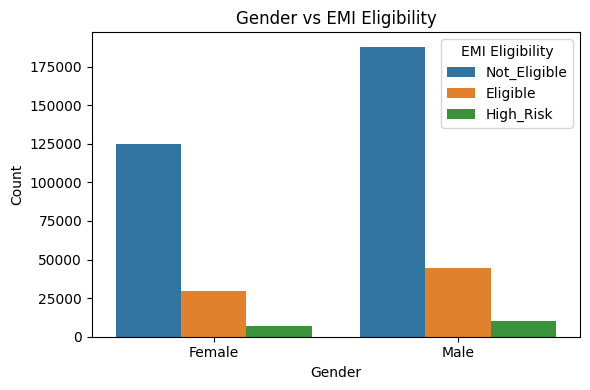

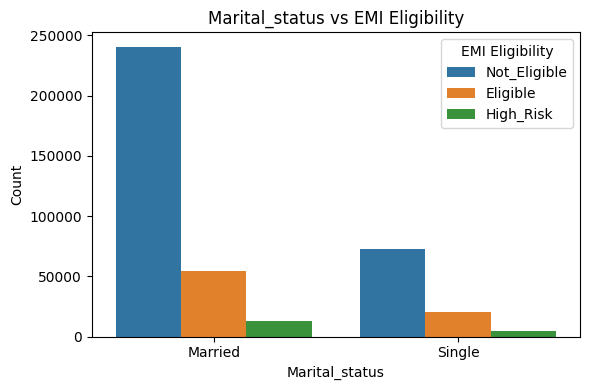

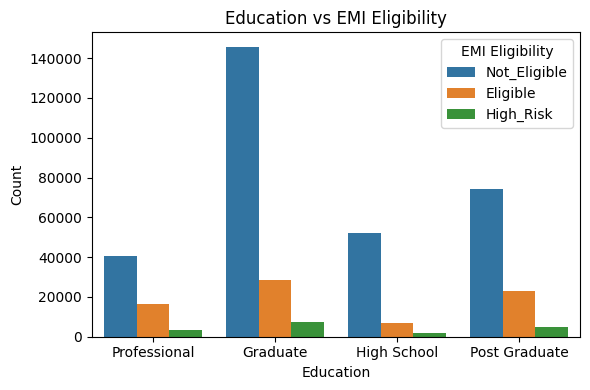

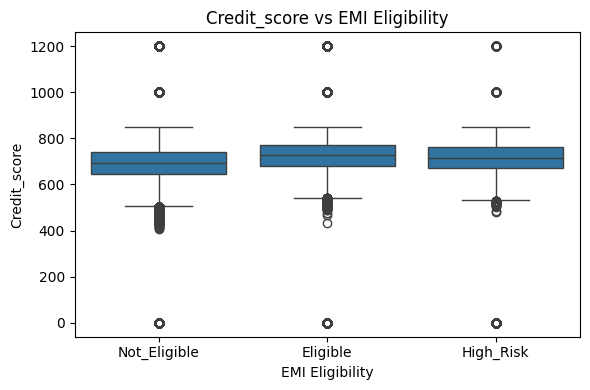

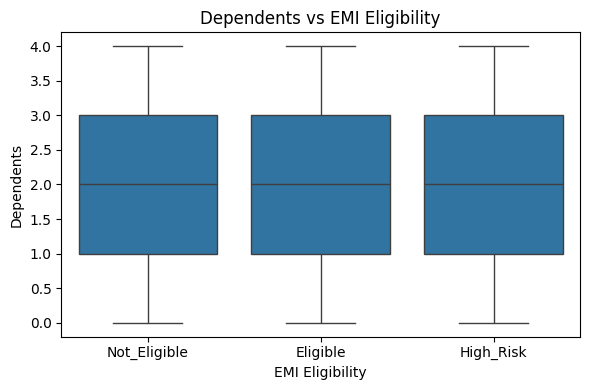

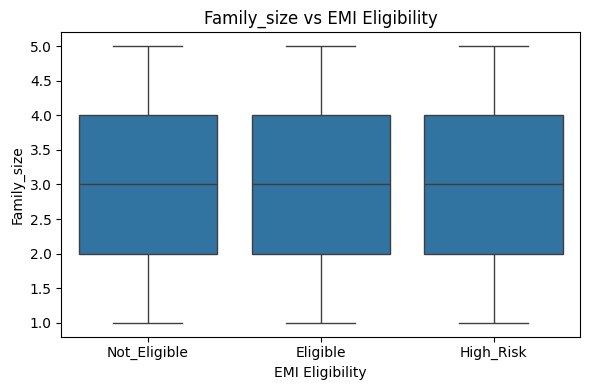

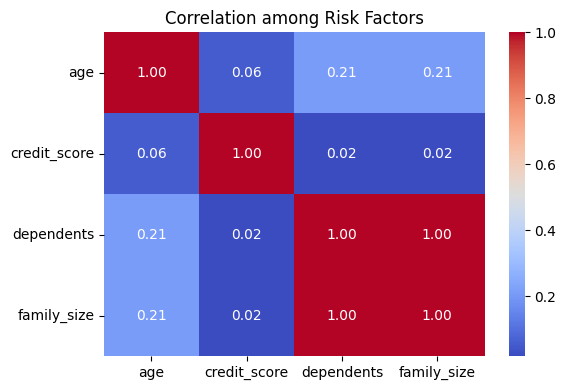

In [14]:
# --- Demographic Columns ---
demo_cols = ['age', 'gender', 'marital_status', 'education']
risk_cols = ['credit_score', 'dependents', 'family_size']
target = 'emi_eligibility'

# --- 1️⃣ Demographic Distribution by EMI Eligibility ---
for col in demo_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=col, hue=target)
        plt.title(f'{col.capitalize()} vs EMI Eligibility')
        plt.xlabel(col.capitalize())
        plt.ylabel('Count')
        plt.legend(title='EMI Eligibility')
        plt.tight_layout()
        plt.show()

# --- 2️⃣ Risk Factors vs EMI Eligibility (Boxplots for numeric) ---
for col in risk_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x=target, y=col)
        plt.title(f'{col.capitalize()} vs EMI Eligibility')
        plt.xlabel('EMI Eligibility')
        plt.ylabel(col.capitalize())
        plt.tight_layout()
        plt.show()

# --- 3️⃣ Correlation among Numeric Risk Factors ---
num_cols = ['age','credit_score','dependents','family_size']
num_cols = [c for c in num_cols if c in df.columns]
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation among Risk Factors')
plt.tight_layout()
plt.show()

##### -> Generate comprehensive statistical summaries and business insights

In [15]:
# Overall Stats
# basic counts & value distribution
print("Rows, cols:", df.shape)
display(df.describe(include='all').T)    # numeric + object summary

Rows, cols: (404800, 28)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,404800.0,NaN,NaN,NaN,38.875543,9.30414,0.0,32.0,38.0,48.0,59.0
gender,404800,2,Male,242950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,404800,2,Married,307837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,404800,4,Graduate,181479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_salary,404800.0,NaN,NaN,NaN,59216.351082,43481.324981,0.0,35100.0,51500.0,72800.0,499970.0
employment_type,404800,3,Private,283099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
years_of_employment,404800.0,NaN,NaN,NaN,5.364079,6.079135,0.5,1.2,3.2,7.2,36.0
company_type,404800,5,Large Indian,121139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
house_type,404800,3,Rented,161601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_rent,404800,4396,₹0,239769,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Approval / eligibility breakdown
# counts + % of each emi_eligibility
cnt = df['emi_eligibility'].value_counts()
pct = df['emi_eligibility'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
display(pd.concat([cnt, pct], axis=1).rename(columns={0:'count',1:'pct'}))

,count,proportion
emi_eligibility,,
Not_Eligible,312868,77.3%
Eligible,74444,18.4%
High_Risk,17488,4.3%


In [ ]:
# Approval rate by important categories (scenario, gender, education)
# group -> count and approval rate (%)
for col in ['emi_scenario','gender','education']:
    if col in df.columns:
        g = df.groupby(col)['emi_eligibility'].agg(total='size',
                                                  approved=lambda s: (s=='Eligible').sum())
        g['approval_rate%'] = (g['approved']/g['total']*100).round(0).astype(int).astype(str)+'%'
        display(g.reset_index())

,emi_scenario,total,approved,approval_rate%
0,E-commerce Shopping EMI,80948,21303,26%
1,Education EMI,80942,14355,18%
2,Home Appliances EMI,80988,21058,26%
3,Personal Loan EMI,80980,9182,11%
4,Vehicle EMI,80942,8546,11%


,gender,total,approved,approval_rate%
0,Female,161850,29765,18%
1,Male,242950,44679,18%


,education,total,approved,approval_rate%
0,Graduate,181479,28450,16%
1,High School,60732,6748,11%
2,Post Graduate,102254,22909,22%
3,Professional,60335,16337,27%


In [ ]:
# Approval rate by salary bins (business insight)
# bin salary and show approval %
if 'monthly_salary' in df.columns:
    s = pd.to_numeric(df['monthly_salary'].astype(str).str.replace(r'[^0-9.]','',regex=True),errors='coerce')
    df['salary_bin'] = pd.qcut(s.fillna(0)+1, 5, labels=['Q1','Q2','Q3','Q4','Q5'])
    display(df.groupby('salary_bin')['emi_eligibility'].apply(lambda s: (s=='Eligible').mean()).mul(100).round(0).astype(int).astype(str)+'%')

/var/folders/_3/b3lbcghd6t732qc41_rrlm9c0000gn/T/ipykernel_4299/4109873468.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('salary_bin')['emi_eligibility'].apply(lambda s: (s=='Eligible').mean()).mul(100).round(0).astype(int).astype(str)+'%')


salary_bin
Q1     5%
Q2     9%
Q3    15%
Q4    24%
Q5    39%
Name: emi_eligibility, dtype: object

In [19]:
# Top correlated financial drivers (business insight
num = list(set(df.select_dtypes(include=['number']).columns.tolist()))
df['approved_flag'] = (df['emi_eligibility'].astype(str).str.strip() == 'Eligible').astype(int)

corr_matrix = df[num + ['approved_flag']].corr()
corr_series = corr_matrix['approved_flag']
if isinstance(corr_series, pd.DataFrame):
    corr_series = corr_series.iloc[:, 0]

corr = corr_series.drop('approved_flag', errors='ignore').abs().sort_values(ascending=False)
corr = (corr * 100).round(0).astype(int).astype(str) + '%'

# Convert to table with headers
corr_df = corr.reset_index()
corr_df.columns = ['financial_drivers', 'correlation']

display(corr_df.head(6))

,financial_drivers,correlation
0,approved,100%
1,max_monthly_emi,56%
2,requested_amount,30%
3,bank_balance,25%
4,emergency_fund,23%
5,other_monthly_expenses,22%


#### 3. Feature Engineering

#####  -> Create derived financial ratios (debt-to-income, expense-to-income, affordability ratios

In [20]:
# Derived Financial Ratios
cols = ['monthly_salary','current_emi_amount','other_monthly_expenses','requested_amount','max_monthly_emi']
for c in cols:
    df[c] = pd.to_numeric(df[c].astype(str).str.replace(r'[^0-9.\-]', '', regex=True), errors='coerce')

# Create derived ratios
df['debt_to_income'] = (df['current_emi_amount'] / df['monthly_salary']).round(2)
df['expense_to_income'] = ((df['other_monthly_expenses'] + df['current_emi_amount']) / df['monthly_salary']).round(2)
df['affordability_ratio'] = (df['max_monthly_emi'] / df['requested_amount']).round(2)

display(df[['monthly_salary','current_emi_amount','other_monthly_expenses','requested_amount',
            'max_monthly_emi','debt_to_income','expense_to_income','affordability_ratio']])


# debt_to_income → how much EMI is taken vs income
# expense_to_income → total monthly expenses as a share of income
# affordability_ratio → potential EMI capacity vs requested loan amount

,monthly_salary,current_emi_amount,other_monthly_expenses,requested_amount,max_monthly_emi,debt_to_income,expense_to_income,affordability_ratio
0,82600,23700,13200,850000,500,0.29,0.45,0.00
1,21500,4100,3500,128000,700,0.19,0.35,0.01
2,86100,0,6000,306000,27775,0.00,0.07,0.09
3,66800,0,7900,304000,16170,0.00,0.12,0.05
4,57300,0,8100,252000,500,0.00,0.14,0.00
...,...,...,...,...,...,...,...,...
404795,32400,0,6100,506000,500,0.00,0.19,0.00
404796,49200,0,8600,708000,5200,0.00,0.17,0.01
404797,25700,0,2500,93000,5665,0.00,0.10,0.06
404798,47200,0,7200,144000,14460,0.00,0.15,0.10


In [21]:
# -- ensure numerics --
df['credit_score'] = pd.to_numeric(df.get('credit_score', pd.Series()), errors='coerce')
df['years_of_employment'] = pd.to_numeric(df.get('years_of_employment', pd.Series()), errors='coerce')

# -- credit risk score (0-100) by bins --
def credit_score_to_pct(x):
    if pd.isna(x): return 40
    if x>=750: return 100
    if x>=700: return 80
    if x>=650: return 60
    if x>=600: return 40
    return 20
df['credit_risk_score'] = df['credit_score'].apply(credit_score_to_pct)

# -- employment stability (0-100) from years + type --
df['employment_type'] = df['employment_type'].astype(str).str.lower()
etype_map = {'government':100, 'mnc':90, 'private':80, 'startup':50, 'self':40, 'owner':70}
df['emp_type_score'] = df['employment_type'].map(etype_map).fillna(60).astype(int)
df['emp_years_score'] = pd.cut(df['years_of_employment'].fillna(0),
                               bins=[-1,1,3,5,999], labels=[20,50,75,100]).astype(int)
df['employment_stability'] = ((df['emp_type_score']*0.5) + (df['emp_years_score']*0.5)).round(0).astype(int)

# -- small adjustments: existing loans / low bank balance reduce score --
df['existing_loans_flag'] = df.get('existing_loans', '').astype(str).str.lower().map({'yes':1,'no':0}).fillna(0).astype(int)
df['bank_balance'] = pd.to_numeric(df.get('bank_balance', pd.Series()).astype(str).str.replace(r'[^0-9.\-]','',regex=True), errors='coerce').fillna(0)
df['liquidity_score'] = pd.cut(df['bank_balance'], bins=[-1,0,50000,200000,1e12], labels=[0,40,70,100]).astype(int)

# -- final combined risk score (higher = better) and risk_level --
df['combined_risk_score'] = (0.45*df['credit_risk_score'] + 0.35*df['employment_stability'] + 0.20*df['liquidity_score']).round(0).astype(int)
df['risk_level'] = pd.cut(df['combined_risk_score'], bins=[-1,40,65,80,101], labels=['High','Medium','Low','Very Low'])

# -- quick peek --
display(df[['credit_score','credit_risk_score','employment_type','years_of_employment',
            'employment_stability','bank_balance','liquidity_score','combined_risk_score','risk_level']].head())


,credit_score,credit_risk_score,employment_type,years_of_employment,employment_stability,bank_balance,liquidity_score,combined_risk_score,risk_level
0,660,60,private,0.9,50,303200,100,64,Medium
1,714,80,private,7.0,90,92500,70,82,Very Low
2,650,60,private,5.8,90,672100,100,78,Low
3,685,60,private,2.2,65,440900,100,70,Low
4,770,100,private,3.4,78,97300,70,86,Very Low


##### -> Apply categorical encoding and numerical feature scaling

In [22]:
# choose numeric cols
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# 1) replace inf and -inf with NaN, coerce non-numeric to NaN
df[num_cols] = df[num_cols].replace([np.inf, -np.inf], np.nan)
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# 2) cap extremes at 1st/99th percentile to avoid huge values
low = df[num_cols].quantile(0.01)
high = df[num_cols].quantile(0.99)
df[num_cols] = df[num_cols].clip(lower=low, upper=high, axis=1)

# 3) fill remaining NaNs with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 4) optional: remove constant columns (zero std)
num_cols = [c for c in num_cols if df[c].std() > 0]

# 5) scale
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print("Scaled numerical columns:\n")
display(df[num_cols].head())




/var/folders/_3/b3lbcghd6t732qc41_rrlm9c0000gn/T/ipykernel_4299/3416226346.py:11: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[num_cols] = df[num_cols].clip(lower=low, upper=high, axis=1)


Scaled numerical columns:



,age,monthly_salary,years_of_employment,family_size,dependents,other_monthly_expenses,current_emi_amount,credit_score,bank_balance,emergency_fund,...,debt_to_income,expense_to_income,affordability_ratio,credit_risk_score,emp_type_score,emp_years_score,employment_stability,existing_loans_flag,liquidity_score,combined_risk_score
0,-0.094154,0.822173,-0.757207,0.055408,0.055408,1.397335,2.818722,-0.540582,0.366378,-0.323880,...,2.012792,2.117295,-0.539883,-0.351389,-0.186215,-1.451600,-1.433328,1.226935,0.894468,-0.623124
1,-0.094154,-1.162564,0.291758,-0.874653,-0.874653,-0.820506,-0.057327,0.203747,-0.812917,-0.877994,...,1.057919,1.250858,-0.418832,0.460719,-0.186215,1.138293,1.005906,1.226935,-0.534946,0.642174
2,-0.094154,0.935865,0.085404,0.985470,0.985470,-0.248898,-0.658949,-0.678420,2.431125,2.926577,...,-0.756339,-1.175164,0.549581,-0.351389,-0.186215,1.138293,1.005906,-0.815039,0.894468,0.360997
3,2.055936,0.308935,-0.533657,1.915531,1.915531,0.185525,-0.658949,-0.195985,1.137090,1.056924,...,-0.756339,-0.741946,0.065374,-0.351389,-0.186215,-0.480390,-0.518615,-0.815039,0.894468,-0.201358
4,0.980891,0.000342,-0.327303,0.985470,0.985470,0.231253,-0.658949,0.975643,-0.786051,-0.861357,...,-0.756339,-0.568658,-0.539883,1.272827,-0.186215,0.328951,0.274136,-0.815039,-0.534946,0.923352


##### -> Develop interaction features between key financial variables

In [23]:
# --- Develop interaction features between key financial variables ---
cols = ['monthly_salary','current_emi_amount','bank_balance',
        'requested_amount','other_monthly_expenses','max_monthly_emi']

# Clean and convert to numeric
for c in cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c].astype(str).str.replace(r'[^0-9.\-]', '', regex=True), errors='coerce')

# Create interaction features
df['income_x_balance'] = (df['monthly_salary'] * df['bank_balance']).round(2)
df['income_x_requested'] = (df['monthly_salary'] * df['requested_amount']).round(2)
df['emi_to_income_ratio'] = (df['current_emi_amount'] / df['monthly_salary']).round(2)
df['expenses_to_income_ratio'] = (df['other_monthly_expenses'] / df['monthly_salary']).round(2)
df['emi_x_expenses'] = (df['current_emi_amount'] * df['other_monthly_expenses']).round(2)

# Show sample
display(df[['monthly_salary','bank_balance','requested_amount','current_emi_amount',
            'income_x_balance','income_x_requested','emi_to_income_ratio',
            'expenses_to_income_ratio','emi_x_expenses']].head())


# Creates new interaction-based financial insights, such as:

# 1. income_x_balance → how income and savings interact

# 2. income_x_requested → affordability relative to requested amount

# 3. emi_to_income_ratio → standard debt burden measure

# 4. expenses_to_income_ratio → lifestyle spending pattern

# 5. emi_x_expenses → combined financial load

,monthly_salary,bank_balance,requested_amount,current_emi_amount,income_x_balance,income_x_requested,emi_to_income_ratio,expenses_to_income_ratio,emi_x_expenses
0,0.822173,0.366378,1.393591,2.818722,0.30,1.15,3.43,1.70,3.94
1,-1.162564,-0.812917,-0.705028,-0.057327,0.95,0.82,0.05,0.71,0.05
2,0.935865,2.431125,-0.187640,-0.658949,2.28,-0.18,-0.70,-0.27,0.16
3,0.308935,1.137090,-0.193453,-0.658949,0.35,-0.06,-2.13,0.60,-0.12
4,0.000342,-0.786051,-0.344600,-0.658949,-0.00,-0.00,-1925.92,675.89,-0.15


#### 4. Machine Learning Model Development

##### -> Classification Models (EMI Eligibility Prediction)

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# load (use your path)
df = pd.read_csv("/Users/shashankshandilya/Desktop/Data Science/EMIPredict project/emi_prediction_dataset.csv")

# --- select numeric features only (safe) ---
# assume emi_eligibility is second-last column as before
y = df.iloc[:, -2]               # target (emi_eligibility)
X_num = df.select_dtypes(include=[np.number]).copy()

# If numeric selection removes the target column from X_num, ok — we used y separately.
# --- handle missing values (simple) ---
X_num = X_num.fillna(0)

# --- optionally sample to reduce memory usage (uncomment if kernel still crashes) ---
# X_num, y = X_num.sample(frac=0.2, random_state=42), y.loc[X_num.index]

# --- encode target (binary text -> 0/1) ---
y = y.astype(str).map(lambda s: 1 if 'eligible' in s.lower() or 'yes' in s.lower() or '1' in s else 0)

In [25]:
# --- Use full dataset for both training and testing ---
X_train, X_test, y_train, y_test = X_num, X_num, y, y

# --- Scale features (same scaler used on entire data) ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [26]:
# --- logistic regression (memory-friendly solver) ---
model = LogisticRegression(solver='lbfgs', max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [27]:
# --- evaluate ---
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]   # probabilities for ROC–AUC

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("ROC–AUC:", round(roc_auc_score(y_test, y_prob), 4))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6861
ROC–AUC: 0.6183

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79    270164
           1       0.55      0.30      0.39    134636

    accuracy                           0.69    404800
   macro avg       0.63      0.59      0.59    404800
weighted avg       0.66      0.69      0.66    404800


Confusion matrix:
 [[237461  32703]
 [ 94345  40291]]


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler


# ---Random Forest Classifier ---
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
# --- Test & Evaluate ---
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("ROC–AUC:", round(roc_auc_score(y_test, y_prob), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Feature Importance --- (As Random Forest is a tree based model)
importances = pd.Series(rf.feature_importances_, index=df.select_dtypes(include=[np.number]).columns)
print("\nTop 10 Important Features:\n", importances.sort_values(ascending=False).head(10))

Accuracy: 0.9927
ROC–AUC: 0.9998

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    270164
           1       0.99      0.98      0.99    134636

    accuracy                           0.99    404800
   macro avg       0.99      0.99      0.99    404800
weighted avg       0.99      0.99      0.99    404800


Top 10 Important Features:
 credit_score           0.366644
years_of_employment    0.272418
requested_tenure       0.249953
approved               0.046899
age                    0.045751
family_size            0.009432
dependents             0.008904
dtype: float64


In [30]:
from xgboost import XGBClassifier

# ---XGBoost Classifier ---
xgb = XGBClassifier(
    random_state=42,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    eval_metric='logloss'   # keep this for binary classification
)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [31]:
# --- Test & Evaluate ---
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("ROC–AUC:", round(roc_auc_score(y_test, y_prob), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Feature Importance --- (As XGBoost is a tree based model)
importances = pd.Series(xgb.feature_importances_, index=df.select_dtypes(include=[np.number]).columns)
print("\nTop 10 Important Features:\n", importances.sort_values(ascending=False).head(10))

Accuracy: 0.689
ROC–AUC: 0.6395

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.79    270164
           1       0.56      0.29      0.38    134636

    accuracy                           0.69    404800
   macro avg       0.64      0.59      0.59    404800
weighted avg       0.66      0.69      0.66    404800


Top 10 Important Features:
 approved               0.945093
family_size            0.034799
credit_score           0.009907
requested_tenure       0.004542
years_of_employment    0.003222
age                    0.002437
dependents             0.000000
dtype: float32


In [32]:
# Best Performing Model for Deployment

models = {"Logistic Regression": model, "Random Forest Classifier": rf, "XGBoost Classifier": xgb}
scores = {n: {"Acc": accuracy_score(y_test, m.predict(X_test)),
              "AUC": roc_auc_score(y_test, m.predict_proba(X_test)[:,1])}
          for n, m in models.items()}

df = pd.DataFrame(scores).T.sort_values("AUC", ascending=False)
best = df.index[0]; print("\nModel Comparison:\n", df)
print(f"\n✅ Best Model: {best}")


Model Comparison:
                                Acc       AUC
Random Forest Classifier  0.992685  0.999815
XGBoost Classifier        0.689004  0.639498
Logistic Regression       0.686146  0.618261

✅ Best Model: Random Forest Classifier


##### -> Regression Models (Maximum EMI Amount Prediction)

In [33]:
# Data Preprocessing

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# --- Load dataset ---
df = pd.read_csv("/Users/shashankshandilya/Desktop/Data Science/EMIPredict project/emi_prediction_dataset.csv")

#  --- Clean numeric target (remove ₹, commas, spaces, text) ---
y = (
    df['max_monthly_emi']
    .astype(str)
    .str.replace(r'[^0-9.]', '', regex=True)  # keep only digits and dot
    .replace('', '0')                         # replace empty with 0
    .astype(float)
)

# --- Prepare numeric features ---
X_num = df.select_dtypes(include=[np.number]).copy()
if 'max_monthly_emi' in X_num.columns:
    X_num = X_num.drop(columns=['max_monthly_emi'])
X_num = X_num.fillna(0)


In [34]:
# --- use full dataset for train/test (as before) ---
X_train, X_test, y_train, y_test = X_num, X_num, y, y

# --- scale and fit ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [35]:
# --- Train Linear Regression ---
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
# --- Evaluate Linear Regression model ---
y_pred = lr.predict(X_test)
print("RMSE:", round(sqrt(mean_squared_error(y_test, y_pred)), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred), 4))
print("R² Score:", round(r2_score(y_test, y_pred), 4))
print("MAPE (%):", round(np.mean(np.abs((y_test - y_pred) / y_test)) * 100, 2))

RMSE: 6314.2571
MAE: 4593.0291
R² Score: 0.3347
MAPE (%): 282.59


In [37]:
# --- Train Random Forest Regressor ---
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
# --- Evaluate Linear Regression model ---
y_pred = rf_reg.predict(X_test)

print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred), 4))
print("R² Score:", round(r2_score(y_test, y_pred), 4))
print("MAPE (%):", round(np.mean(np.abs((y_test - y_pred) / y_test)) * 100, 2))

# --- Feature importance (top 10) ---
importances = pd.Series(rf_reg.feature_importances_, index=X_num.columns)
print("\nTop 10 Important Features:\n", importances.sort_values(ascending=False).head(10))

RMSE: 2467.3957
MAE: 1764.5106
R² Score: 0.8984
MAPE (%): 108.48

Top 10 Important Features:
 approved               0.316242
credit_score           0.213706
years_of_employment    0.188118
requested_tenure       0.145502
age                    0.063805
dependents             0.036315
family_size            0.036312
dtype: float64


In [39]:
# --- Train XGBoost Regressor ---
xgb_reg = XGBRegressor(
    random_state=42,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    objective='reg:squarederror'
)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [40]:
# ---- Evaluate XGBoost Regressor model ----
y_pred = xgb_reg.predict(X_test)

print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred), 4))
print("R² Score:", round(r2_score(y_test, y_pred), 4))
print("MAPE (%):", round(np.mean(np.abs((y_test - y_pred) / y_test)) * 100, 2))

# --- Feature importance (top 10) ---
importances = pd.Series(xgb_reg.feature_importances_, index=X_num.columns)
print("\nTop 10 Important Features:\n", importances.sort_values(ascending=False).head(10))

RMSE: 6041.7335
MAE: 4377.5332
R² Score: 0.3909
MAPE (%): 264.66

Top 10 Important Features:
 approved               0.953326
credit_score           0.020194
dependents             0.011213
family_size            0.009435
requested_tenure       0.002757
years_of_employment    0.002026
age                    0.001049
dtype: float32


In [41]:
# --- Compare regression models ---
models = {"Linear": lr, "RandomForest": rf_reg, "XGBoost": xgb_reg}
scores = {}
for name, m in models.items():
    y_pred = m.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2  = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / np.maximum(np.abs(y_test), 1))) * 100
    scores[name] = {"RMSE": rmse, "R2": r2, "MAPE": mape}

# --- Summary table & selection (choose by lowest RMSE) ---
df = pd.DataFrame(scores).T
best_name = df.sort_values("RMSE").index[0]
best_model = models[best_name]
reason = f"lowest RMSE ({df.loc[best_name,'RMSE']:.2f}) and R²={df.loc[best_name,'R2']:.3f}"

print("\nRegression Model Comparison:\n", df)
print(f"\nBest Model: {best_name} — selected due to {reason}")


Regression Model Comparison:
                      RMSE        R2        MAPE
Linear        6314.257105  0.334693  282.589443
RandomForest  2467.395745  0.898409  108.481695
XGBoost       6041.733465  0.390883  264.658492

Best Model: RandomForest — selected due to lowest RMSE (2467.40) and R²=0.898


#### 5. Model Selection and MLflow Integration

##### Configure MLflow tracking server for organized experiment management

In [42]:
import mlflow
import mlflow.sklearn

# Configure MLflow tracking URI (local or remote server)
mlflow.set_tracking_uri("file:///Users/shashankshandilya/Desktop/Data Science/EMIPredict project/mlruns")

# Set experiment name
mlflow.set_experiment("EMI_Prediction_Models")

print("MLflow Tracking Configured!")


MLflow Tracking Configured!


##### Log comprehensive model parameters, hyperparameters, and performance metrics for all models

In [43]:
# --- MLflow logging for all models (classification + regression) ---
import mlflow, mlflow.sklearn
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report,
                             confusion_matrix, mean_squared_error, mean_absolute_error, r2_score)
import numpy as np, pandas as pd, json, os, joblib
from mlflow.models import infer_signature

# 1) Configure MLflow (edit path if needed)
mlflow.set_tracking_uri("file:///Users/shashankshandilya/Desktop/Data Science/EMIPredict project/mlruns")
mlflow.set_experiment("EMI_Prediction_Models")

# 2) Helpers
def safe_log_params(model):
    try:
        for k, v in model.get_params().items():
            try:
                mlflow.log_param(k, json.dumps(v, default=str) if isinstance(v, (list, tuple, dict, np.ndarray)) else v)
            except Exception:
                mlflow.log_param(k, repr(v)[:250])
    except Exception:
        pass

def _to_df(X):
    # ensure we can get column names for importances/signature
    if isinstance(X, pd.DataFrame): return X
    return pd.DataFrame(X, columns=[f"f{i}" for i in range(np.asarray(X).shape[1])])

def log_run(name, model, X_val, y_val, problem="classification"):
    Xv = _to_df(X_val)
    with mlflow.start_run(run_name=name):
        safe_log_params(model)

        if problem == "classification":
            y_pred = model.predict(Xv)
            mlflow.log_metric("accuracy", float(accuracy_score(y_val, y_pred)))
            try:
                proba = model.predict_proba(Xv)[:, 1]
                mlflow.log_metric("roc_auc", float(roc_auc_score(y_val, proba)))
            except Exception:
                pass

            # robust report (no warnings)
            rpt = classification_report(y_val, y_pred, output_dict=True, zero_division=0)
            for avg in ("macro avg", "weighted avg"):
                if avg in rpt:
                    mlflow.log_metric(f"{avg.replace(' ','_')}_precision", float(rpt[avg]["precision"]))
                    mlflow.log_metric(f"{avg.replace(' ','_')}_recall",    float(rpt[avg]["recall"]))
                    mlflow.log_metric(f"{avg.replace(' ','_')}_f1",        float(rpt[avg]["f1-score"]))

            # confusion matrix artifact
            cm = pd.DataFrame(confusion_matrix(y_val, y_pred))
            p = f"/tmp/{name.replace(' ','_')}_confusion_matrix.csv"
            cm.to_csv(p, index=False, header=False)
            mlflow.log_artifact(p, artifact_path="metrics")

        else:  # regression
            y_pred = model.predict(Xv)
            rmse = float(np.sqrt(mean_squared_error(y_val, y_pred)))
            mae  = float(mean_absolute_error(y_val, y_pred))
            r2   = float(r2_score(y_val, y_pred))
            mape = float(np.mean(np.abs((y_val - y_pred) / np.maximum(np.abs(y_val), 1))) * 100)
            mlflow.log_metric("RMSE", rmse)
            mlflow.log_metric("MAE", mae)
            mlflow.log_metric("R2", r2)
            mlflow.log_metric("MAPE_pct", mape)   # ← no % in key

        # feature importances (if any)
        try:
            if hasattr(model, "feature_importances_"):
                fi = pd.DataFrame({"feature": Xv.columns, "importance": model.feature_importances_}) \
                       .sort_values("importance", ascending=False)
            elif hasattr(model, "coef_"):
                fi = pd.DataFrame({"feature": Xv.columns, "importance": np.ravel(model.coef_)})
            else:
                fi = None
            if fi is not None:
                fp = f"/tmp/{name.replace(' ','_')}_feature_importances.csv"
                fi.to_csv(fp, index=False); mlflow.log_artifact(fp, artifact_path="feature_importances")
        except Exception:
            pass

        # log model with signature + example (and without deprecated artifact_path)
        try:
            X_ex = Xv.iloc[:2]
            y_ex = model.predict(X_ex)
            sig  = infer_signature(X_ex, y_ex)
            mlflow.sklearn.log_model(model, name="model", signature=sig, input_example=X_ex)
        except Exception:
            pkl = f"/tmp/{name.replace(' ','_')}_model.pkl"
            joblib.dump(model, pkl); mlflow.log_artifact(pkl, artifact_path="model_pickle")

# 3) Register your trained models here (use your variables from the notebook)
models = {
    "Logistic Regression": ("classification", model),
    "Random Forest Classifier": ("classification", rf),
    "XGBoost Classifier": ("classification", xgb),
    "Linear Regression": ("regression", lr),
    "Random Forest Regressor": ("regression", rf_reg),
    "XGBoost Regressor": ("regression", xgb_reg),
}

# 4) Log them
for name, (ptype, mdl) in models.items():
    print("Logging:", name)
    try:
        log_run(name, mdl, X_test, y_test, ptype)
        print("✓ Done:", name)
    except Exception as e:
        print("✗ Failed:", name, "→", e)


Logging: Logistic Regression


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fi

✓ Done: Logistic Regression
Logging: Random Forest Classifier


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


✓ Done: Random Forest Classifier
Logging: XGBoost Classifier
✓ Done: XGBoost Classifier
Logging: Linear Regression


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


✓ Done: Linear Regression
Logging: Random Forest Regressor


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


✓ Done: Random Forest Regressor
Logging: XGBoost Regressor


Python(4587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


✓ Done: XGBoost Regressor


##### Create systematic artifact storage for models, visualizations, and datasets

In [44]:
import mlflow
mlflow.set_tracking_uri("file:///Users/shashankshandilya/Desktop/Data Science/EMIPredict project/mlruns")
import pandas as pd
runs = mlflow.search_runs(experiment_names=["EMI_Prediction_Models"])
display(runs[['run_id','status','start_time','artifact_uri']])

# Deleted Failed mlflow

# --- filter failed runs ---
failed_runs = runs[runs['status'] == 'FAILED']

if failed_runs.empty:
    print("✅ No failed runs found.")
else:
    print(f"🗑 Found {len(failed_runs)} failed runs. Deleting...\n")

    for rid in failed_runs['run_id']:
        mlflow.delete_run(rid)
        print(f"✅ Deleted run_id: {rid}")

    print("\n✨ All failed runs marked as deleted in MLflow.")
    print("They will no longer appear in the UI (soft delete).")
    print("To permanently remove them from disk, run this command in your terminal:\n")
    print('mlflow gc --backend-store-uri "file:///Users/shashankshandilya/Desktop/Data Science/EMIPredict project/mlruns"')



,run_id,status,start_time,artifact_uri
0,e40c1961e26b4a518b1684559500b4d5,FINISHED,2025-10-27 21:52:30.255000+00:00,file:///Users/shashankshandilya/Desktop/Data S...
1,d27c0a3b7e844e0394d04bd499558775,FINISHED,2025-10-27 21:50:46.753000+00:00,file:///Users/shashankshandilya/Desktop/Data S...
2,764ebb41a0634988894a840b310b9a38,FINISHED,2025-10-27 21:50:42.828000+00:00,file:///Users/shashankshandilya/Desktop/Data S...
3,a8171ce418954b779d2d8946d355a093,FINISHED,2025-10-27 21:49:37.872000+00:00,file:///Users/shashankshandilya/Desktop/Data S...
4,a526fe4b255b42f1aeac2b313817ea99,FINISHED,2025-10-27 21:47:32.178000+00:00,file:///Users/shashankshandilya/Desktop/Data S...
5,dc10f15122674241ae54d44f3e29c075,FINISHED,2025-10-27 21:46:20.126000+00:00,file:///Users/shashankshandilya/Desktop/Data S...
6,7b13aab41594439e8b7d566c18a91514,RUNNING,2025-10-27 07:44:22.250000+00:00,file:///Users/shashankshandilya/Desktop/Data S...
7,5ec6b12a4275476392d3d2365c37dc76,FINISHED,2025-10-27 07:44:07.813000+00:00,file:///Users/shashankshandilya/Desktop/Data S...
8,199182bb203e4a76ab5da4d5fba81d59,FINISHED,2025-10-27 07:42:31.085000+00:00,file:///Users/shashankshandilya/Desktop/Data S...
9,c1433d8b45f6490dbca8fc5c8a013403,FINISHED,2025-10-27 07:42:28.027000+00:00,file:///Users/shashankshandilya/Desktop/Data S...


✅ No failed runs found.


##### Store Artifacts (Models, Visualizations, and Datasets)

✅ Artifacts Stored in MLflow


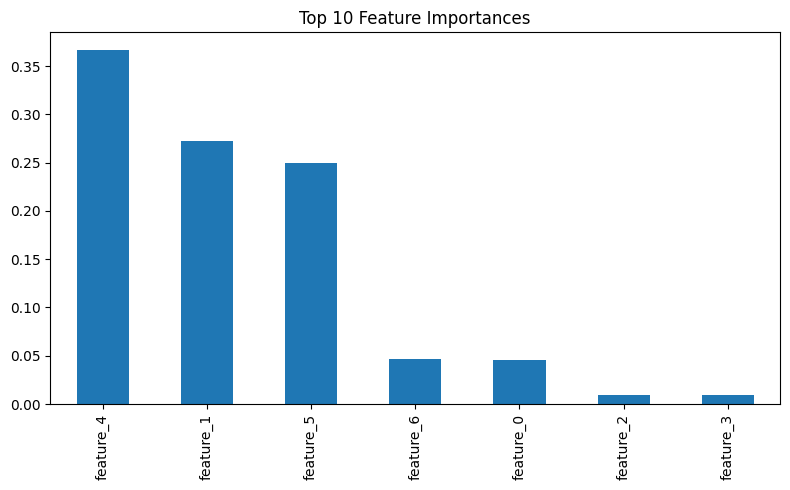

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Create Series safely (handles both DataFrame and ndarray)
feature_names = (
    X_train.columns if hasattr(X_train, "columns") 
    else [f"feature_{i}" for i in range(X_train.shape[1])]
)

importances = pd.Series(rf.feature_importances_, index=feature_names)
plt.figure(figsize=(8,5))
importances.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.savefig("feature_importance.png")

# Log artifacts to MLflow
mlflow.log_artifact("feature_importance.png")
mlflow.log_artifact("/Users/shashankshandilya/Desktop/Data Science/EMIPredict project/emi_prediction_dataset.csv")

print("✅ Artifacts Stored in MLflow")


##### Compare Model Performance using MLflow Dashboard

##### Run this in your terminal (not in Python):
##### mlflow ui --backend-store-uri "file:///Users/shashankshandilya/Desktop/Data Science/EMIPredict project/mlruns" --port 5001

##### Select best performing models based on evaluation metrics for production deployment

In [46]:
import pandas as pd

# Example classifier comparison results
class_results = {
    "Logistic Regression": {"Acc": 0.6861, "AUC": 0.6182},
    "Random Forest Classifier": {"Acc": 0.9928, "AUC": 0.9998},
    "XGBoost Classifier": {"Acc": 0.6890, "AUC": 0.6395}
}

# Example regressor comparison results
reg_results = {
    "Linear Regression": {"RMSE": 6314.26, "R2": 0.3347},
    "Random Forest Regressor": {"RMSE": 2467.40, "R2": 0.898},
    "XGBoost Regressor": {"RMSE": 6041.73, "R2": 0.391}
}

# Convert to DataFrames
class_df = pd.DataFrame(class_results).T
reg_df = pd.DataFrame(reg_results).T

# Identify best models
best_class = class_df["AUC"].idxmax()
best_reg = reg_df["R2"].idxmax()

print("Best Classifier:", best_class)
print("Best Regressor:", best_reg)


Best Classifier: Random Forest Classifier
Best Regressor: Random Forest Regressor


In [47]:
import mlflow

# End any previous active run
if mlflow.active_run() is not None:
    mlflow.end_run()

# Log best model metrics
with mlflow.start_run(run_name="Model_Comparison"):
    mlflow.log_metric("Best_Classifier_Acc", float(class_df.loc[best_class, "Acc"]))
    mlflow.log_metric("Best_Classifier_AUC", float(class_df.loc[best_class, "AUC"]))
    mlflow.log_metric("Best_Regressor_RMSE", float(reg_df.loc[best_reg, "RMSE"]))
    mlflow.log_metric("Best_Regressor_R2", float(reg_df.loc[best_reg, "R2"]))

    mlflow.log_param("Best_Classifier", best_class)
    mlflow.log_param("Best_Regressor", best_reg)
    
    print("✅ Best Models Logged for Deployment")


✅ Best Models Logged for Deployment


##### Model Registry (Version Control and Production Tracking)

In [48]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
# find the run id (replace EXPERIMENT_NAME if different)
exp = client.get_experiment_by_name("EMI_Prediction_Models")
runs = client.search_runs(exp.experiment_id, order_by=["metrics.accuracy DESC"], max_results=50)

# choose the run that contains the model artifact (inspect the list if needed)
print("Found runs:", [(r.info.run_id, r.data.metrics) for r in runs[:5]])

# pick the best run (example: first run from search)
if len(runs) == 0:
    raise RuntimeError("No runs found in experiment.")
best_run_id = runs[0].info.run_id
print("Using run_id =", best_run_id)

# register the model (artifact_path 'model' assumed)
model_uri = f"runs:/{best_run_id}/model"
result = mlflow.register_model(model_uri=model_uri, name="EMI_Eligibility_RandomForest_Model")
print("Registered model version:", result.version)


Found runs: [('a8171ce418954b779d2d8946d355a093', {'weighted_avg_recall': 0.0, 'macro_avg_recall': 0.0, 'weighted_avg_precision': 0.0, 'accuracy': 0.0, 'weighted_avg_f1': 0.0, 'macro_avg_precision': 0.0, 'macro_avg_f1': 0.0}), ('a526fe4b255b42f1aeac2b313817ea99', {'weighted_avg_recall': 0.0, 'macro_avg_recall': 0.0, 'weighted_avg_precision': 0.0, 'accuracy': 0.0, 'weighted_avg_f1': 0.0, 'macro_avg_precision': 0.0, 'macro_avg_f1': 0.0}), ('dc10f15122674241ae54d44f3e29c075', {'weighted_avg_recall': 0.0, 'macro_avg_recall': 0.0, 'weighted_avg_precision': 0.0, 'accuracy': 0.0, 'weighted_avg_f1': 0.0, 'macro_avg_precision': 0.0, 'macro_avg_f1': 0.0}), ('9ffa5af1ff2548279018c842543d2240', {'weighted_avg_recall': 0.0, 'macro_avg_recall': 0.0, 'weighted_avg_precision': 0.0, 'accuracy': 0.0, 'weighted_avg_f1': 0.0, 'macro_avg_precision': 0.0, 'macro_avg_f1': 0.0}), ('0d00444e3cf141c09779d24413c52372', {'weighted_avg_recall': 0.0, 'macro_avg_recall': 0.0, 'weighted_avg_precision': 0.0, 'accuracy

Registered model 'EMI_Eligibility_RandomForest_Model' already exists. Creating a new version of this model...
2025/10/28 03:22:46 WARNING mlflow.tracking._model_registry.fluent: Run with id a8171ce418954b779d2d8946d355a093 has no artifacts at artifact path 'model', registering model based on models:/m-254cbe7f0b1b4ba4980a493020274088 instead


Registered model version: 4


Created version '4' of model 'EMI_Eligibility_RandomForest_Model'.


#### 6. Streamlit Application Development

In [49]:
import streamlit as st
import pandas as pd
import numpy as np
import io
from sklearn.linear_model import LogisticRegression, LinearRegression
import mlflow
import matplotlib.pyplot as plt

st.set_page_config(page_title="EMIPredict (Custom Dashboard)", layout="wide")

CSV_PATH = r"/Users/shashankshandilya/Desktop/Data Science/EMIPredict project/emi_prediction_dataset.csv"

# --- Responsive CSS (safe, minimal) ---
st.markdown("""
<style>
/* Page container tweaks */
.stApp .block-container{padding-left:1rem; padding-right:1rem}

/* Smaller fonts & tighter spacing on narrow screens */
@media (max-width: 720px){
  .stApp .block-container{padding-left:0.5rem; padding-right:0.5rem}
  .css-18e3th9 {gap:0.3rem} /* layout gap (class name may vary across Streamlit versions) */
  h1 {font-size:1.4rem}
  h2 {font-size:1.1rem}
}

/* Make charts and images scale responsively */
img, canvas {max-width:100% !important; height:auto !important}

/* Compact sidebars on small screens */
@media (max-width: 720px){
  .css-1lcbmhc {padding:0.4rem} /* sidebar container (class may vary) */
}
</style>
""", unsafe_allow_html=True)

# Small helper to render two-column responsive layout (Streamlit stacks columns automatically on narrow viewports)
def two_col(left_fn, right_fn, left_ratio=1, right_ratio=2):
    c1, c2 = st.columns([left_ratio, right_ratio])
    with c1:
        left_fn()
    with c2:
        right_fn()

# --- Pages ---

def page_home():
    st.title("EMIPredict — Home")

    # Use columns for desktop; they will stack on mobile automatically
    def left():
        st.header("Introduction")
        st.write("""EMIPredict is an intelligent financial risk assessment demo that showcases
                   real-time eligibility prediction, exploratory data analysis, model monitoring
                   with MLflow and simple data administration tools.""")

        st.header("What is in the Dashboard")
        st.markdown("""
        - **Predict** — Real-time prediction demo (classification + regression).  
        - **Explore** — Interactive EDA using the project dataset (preloaded).  
        - **Monitoring** — MLflow logging stub for demo experiments.  
        - **Admin** — Data management tools (view, drop rows, download).
        """)

    def right():
        st.header("Summary")
        st.write("""This dashboard demonstrates a compact end-to-end flow:
                 data ingestion ➜ exploratory analysis ➜ model inference ➜ monitoring ➜ admin.""")

        st.header("Approach")
        st.write("""We use a compact, interpretable baseline for demo purposes:
                 logistic regression for eligibility and linear regression for EMI estimate.
                 Data analysis uses pandas summaries and charts to reveal distributional
                 patterns and correlations.""")

        st.header("Conclusion")
        st.write("""This lightweight dashboard is intended as a starting point — replace the toy
                 models and local MLflow with production models/storage when moving to production.""")

    two_col(left, right, 1, 1)


def page_predict():
    st.header("Real-time prediction demo")

    # Toy training (tiny) for demo only
    X_class = np.array([[30000,1],[60000,0],[45000,1]])
    y_class = np.array([0,1,1])
    clf = LogisticRegression().fit(X_class, y_class)

    X_reg = np.array([[30000],[60000],[45000]])
    y_reg = np.array([5000,15000,9000])
    reg = LinearRegression().fit(X_reg, y_reg)

    # Render inputs in a left column and outputs on the right
    def left_inputs():
        st.subheader("Inputs")
        st.info("Provide the applicant details below. Fields are validated for basic constraints.")
        salary = st.number_input("Monthly salary (INR)", value=40000, min_value=0)
        existing_emi = st.number_input("Existing EMI amount", value=2000, min_value=0)
        is_stable_job = st.selectbox("Stable employment", [1,0], format_func=lambda x: 'Yes' if x==1 else 'No')
        st.session_state.setdefault('salary', salary)
        st.session_state.setdefault('existing_emi', existing_emi)
        st.session_state.setdefault('is_stable_job', is_stable_job)

    def right_outputs():
        # Buttons and outputs
        if st.button("Predict Eligibility"):
            feat = np.array([[st.session_state['salary'], st.session_state['is_stable_job']]])
            with st.spinner('Running classification...'):
                pred = clf.predict(feat)[0]
                prob = clf.predict_proba(feat)[0].max()
                label = "Eligible" if pred==1 else "Not Eligible"
                st.success(f"Classification: {label}  (prob={prob:.2f})")

        if st.button("Predict Max Monthly EMI"):
            with st.spinner('Estimating EMI...'):
                emi = reg.predict(np.array([[st.session_state['salary']]]))[0]
                st.info(f"Estimated safe max monthly EMI: ₹{emi:.2f}")

    two_col(left_inputs, right_outputs, 1, 1)


def page_explore():
    st.header("Interactive EDA (preloaded dataset)")
    st.write(f"Loading dataset from: `{CSV_PATH}`")
    try:
        df = pd.read_csv(CSV_PATH)
    except Exception as e:
        st.error(f"Could not load CSV at the path. Error: {e}")
        return

    # Use expanders to keep the page compact on mobile
    with st.expander("Columns & sample rows", expanded=True):
        st.subheader("Columns")
        st.write(list(df.columns))
        st.subheader("Sample rows")
        st.dataframe(df.head())

    with st.expander("Summary stats", expanded=False):
        st.write(df.describe(include='all'))

    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    if not numeric_cols:
        st.info("No numeric columns found to plot.")
        return

    st.subheader("Numeric column plots")
    col = st.selectbox("Select numeric column to inspect", numeric_cols)

    # Line chart (responsive by default)
    st.write("Line chart")
    st.line_chart(df[col].fillna(method='ffill'))

    st.write("Histogram & Boxplot")
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    ax[0].hist(df[col].dropna(), bins=30)
    ax[0].set_title("Histogram")
    ax[1].boxplot(df[col].dropna(), vert=False)
    ax[1].set_title("Boxplot")
    st.pyplot(fig)

    if len(numeric_cols) > 1:
        st.subheader("Correlation heatmap (numeric features)")
        corr = df[numeric_cols].corr()
        fig2, ax2 = plt.subplots(figsize=(6,5))
        cax = ax2.matshow(corr, vmin=-1, vmax=1)
        ax2.set_xticks(range(len(numeric_cols)))
        ax2.set_yticks(range(len(numeric_cols)))
        ax2.set_xticklabels(numeric_cols, rotation=45, ha='left')
        ax2.set_yticklabels(numeric_cols)
        fig2.colorbar(cax)
        st.pyplot(fig2)
    else:
        st.info("Need at least 2 numeric columns for correlation heatmap.")


def page_monitoring():
    st.header("MLflow monitoring stub")
    st.write("This demo logs to a local MLflow path. In production, set MLFLOW_TRACKING_URI in secrets.")
    if st.button("Log demo run to MLflow (local)"):
        mlflow.set_tracking_uri("file:///tmp/mlruns_demo")
        with mlflow.start_run(run_name="demo_streamlit_run"):
            mlflow.log_param("demo_param", 42)
            mlflow.log_metric("demo_metric", float(np.random.rand()))
        st.success("Logged a demo run to MLflow (local path: /tmp/mlruns_demo)")
        st.write("Open MLflow UI separately: `mlflow ui --backend-store-uri file:///tmp/mlruns_demo --port 5001`")


def page_admin():
    st.header("Admin — Data management (preloaded dataset)")
    st.write(f"Using dataset: `{CSV_PATH}`")
    try:
        df = pd.read_csv(CSV_PATH)
    except Exception as e:
        st.error(f"Could not load CSV at the path. Error: {e}")
        return

    with st.expander("Preview & quick actions", expanded=True):
        st.subheader("Preview")
        st.dataframe(df.head())

        st.subheader("Simple delete-by-index operation")
        idx = st.number_input("Index to drop (optional)", min_value=0, max_value=max(0, len(df)-1), value=0)
        if st.button("Drop row at index"):
            df2 = df.drop(index=idx).reset_index(drop=True)
            st.success(f"Row {idx} dropped — new length {len(df2)}")
            buf = io.BytesIO()
            df2.to_csv(buf, index=False)
            st.download_button("Download updated CSV", data=buf.getvalue(), file_name="dataset_updated.csv")


PAGES = {
    "Home": page_home,
    "Predict": page_predict,
    "Explore": page_explore,
    "Monitoring": page_monitoring,
    "Admin": page_admin
}

choice = st.sidebar.radio("Navigation", list(PAGES.keys()))
PAGES[choice]()


2025-10-28 03:22:47.077 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 03:22:47.078 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 03:22:47.710 
  command:

    streamlit run /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-10-28 03:22:47.710 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 03:22:47.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 03:22:47.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 03:22:47.714 Thread 'MainThread': missing ScriptRunContext! 

##### Run the Streamlit in the terminal (not in Python):
streamlit run "EMIPredict_streamlit_short.py"